# A toy black box

Let's run a random walk (a bunch of particles jumping randomly) in a periodic 2-dimensional domain (a torus), and let's diagnose their center of mass (average position) and moment of inertia (variance of their positions) after each jump.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Typical scientific software looks like this: There's a piece of code that does it all. There are hardly any abstractions. Dependencies are hard to figure out, etc.

In [2]:
def run_random_walk(
    length_x=10,
    length_y=20,
    number_particles=100,
    number_steps=100,
    step_length=0.5
): 
    # initialize particle positions
    x = np.full((number_particles, ), length_x / 2)
    y = np.full((number_particles, ), length_y / 2)

    # initialize diagnostics
    center_of_mass_x = np.empty((number_steps, ))
    center_of_mass_x[0] = x.mean()
    
    center_of_mass_y = np.empty((number_steps, ))
    center_of_mass_y[0] = y.mean()
    
    moment_of_inertia = np.empty((number_steps, ))
    moment_of_inertia[0] = x.var() + y.var()   
    
    # main loop
    for step in range(number_steps - 1):
        x += step_length * (
            np.random.normal(size=(number_particles, ))
        )
        x = np.mod(x, length_x)

        y += step_length * (
            np.random.normal(size=(number_particles, ))
        )
        y = np.mod(y, length_y)

        center_of_mass_x[step+1] = x.mean()
        center_of_mass_y[step+1] = y.mean()
        moment_of_inertia[step+1] = x.var() + y.var()
    
    return center_of_mass_x, center_of_mass_y, moment_of_inertia, x, y

But the typical user of scientific software doesn't look at this anyway. They see:

In [3]:
(
    center_of_mass_x, center_of_mass_y,
    moment_of_inertia,
    x, y
) = run_random_walk(number_steps=1000)

And then, they look at data:

In [4]:
data = pd.DataFrame()
data["center_of_mass_x"] = center_of_mass_x
data["center_of_mass_y"] = center_of_mass_y
data["moment_of_inertia"] = moment_of_inertia
data["step"] = np.arange(len(data))
data.set_index("step")

,center_of_mass_x,center_of_mass_y,moment_of_inertia
step,,,
0,5.000000,10.000000,0.000000
1,4.937826,9.944660,0.556502
2,4.904485,9.971942,1.086390
3,4.923400,9.936071,1.617475
4,4.894775,9.992054,2.261305
...,...,...,...
995,4.783026,9.523111,43.626006
996,5.214035,9.515974,43.555432
997,4.955212,9.641126,44.066695


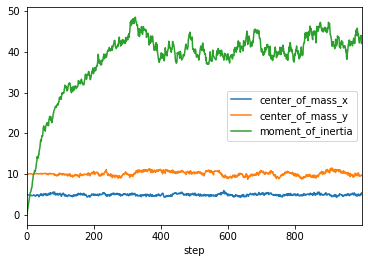

In [5]:
data.plot(x="step");

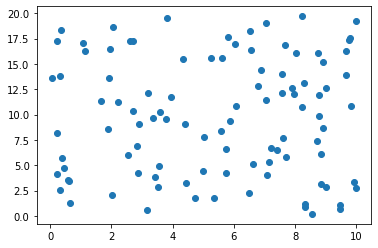

In [6]:
plt.scatter(x, y);